# Simple CV program to detect lane lines from a camera

### Project to practice CV2 applications on self-driving cars (basic programme)

#### @MoisesBarbera  
#### https://www.github.com/MoisesBarbera   //   https://www.kaggle.com/moisesbarbera   // https://www.linkedin.com/in/moises-barbera-ramos-8a3848164/

## #1 Libraries needed

In [112]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2
import warnings
warnings.filterwarnings("ignore")

## #2 Uploading the image for study

In [113]:
image_color = mpimg.imread('image_lane_c.jpg') #Uploading the original image from the folder 

(540, 960, 3)

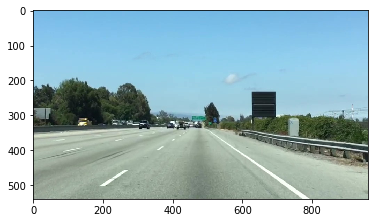

In [114]:
plt.imshow(image_color) #Showing the original image and it's shape (with 3 layers) on the screen
image_color.shape

(540, 960, 3)

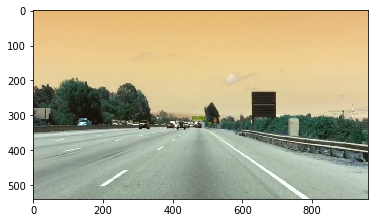

In [150]:
image_color = cv2.imread('image_lane_c.jpg') #Using CV2 to upload the original image with BGR colors as RGB.
plt.imshow(image_color) #Showing the image uploaded with CV2 filters and showing it's shape (with 3 layers) on screen.
image_color.shape

(540, 960)

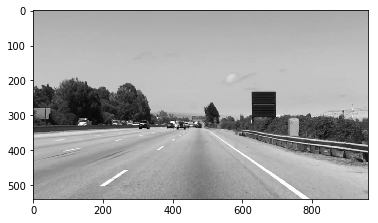

In [151]:
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY) #Using CV2 to aply a gray scale only filter to the image. Colors are now converted into the gray scale.
plt.imshow(image_gray, cmap = 'gray') #show the gray image on screen with color map equal too gray. (Gray is the same as Grey).
image_gray.shape #Display the shape of the gray image, with one layer only this time.

## #3 Differentiate the white lanes on the road

In [117]:
image_copy = np.copy(image_gray) #Copy the gray image to avoid modifying it.
image_copy.shape #Display the shape (one layer only)

(540, 960)

In [152]:
image_copy[ (image_copy[:,:] < 250) ] = 0 #We consider white pixels all of those between 250 and 255 bits so we select all the pixels under 250 (those which are not bright white) and assign them as false or black. 

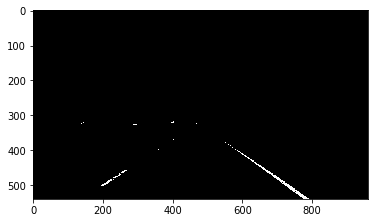

In [153]:
plt.imshow(image_copy, cmap = 'gray') #Show the copied  image in color map gray after applying the condition of bright white colors only.
plt.show()

In [154]:
image_copy2 = np.copy(image_color) #Trying to obtain better results, we do a second copy, this time using the original image after uploading it through CV2 commands.
image_copy2.shape #Show the shape of the image, three layers as it has been copied from the colored pictures.

(540, 960, 3)

In [157]:
image_copy2[ (image_copy2[:,:,0] < 200) | (image_copy2[:,:,1] < 200) | (image_copy2[:,:,2] < 200) ] = 0  # As there are three layers we have to apply the limiting conditions to all three of them. As this copiedd image has colors, we consider white all of those who are over 200 bits and so all the colors under that limit will be assigned as false or black pixels.

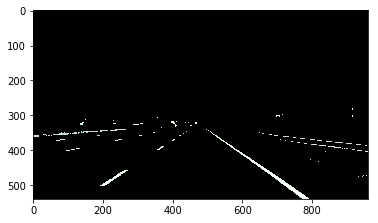

In [156]:
plt.imshow(image_copy2, cmap = 'gray') #Show the second copied image in color map gray after applying the condition of white colors only. As applied on a three layer picture, with more efficient limits, the differences between the lane lines and the rest of the road are easier to see than on the previous methode. 
plt.show()

## 4# Finding the region of interest

In [173]:
height, width = image_copy2.shape[:2] #assign the names height and width to both the two limits on the picture's shape.

ROI = np.array([[(135, height),(440,337), (500, 337), (800, height)]], dtype = np.int32) #Delimiting the 4 points, after easy observation of the blank points on the previous image, that create the shape of our region of interest

blank = np.zeros_like(image_gray) #Place our image on graye scale on a canvas with same shape and all pixels equal to zero, black.
blank.shape

(540, 960)

In [174]:
# Fill the Region of interest with white color (ie: 255)!
mask = cv2.fillPoly(blank, ROI, 255) #Our region of interest will be detectedd by CV2 and we will assign that region as ones, white color, over the zeros, black color, assigned to the canvas.
    
# Perform bitwise AND operation to select only the region of interest
masked_image = cv2.bitwise_and(image_gray, mask)

(540, 960)

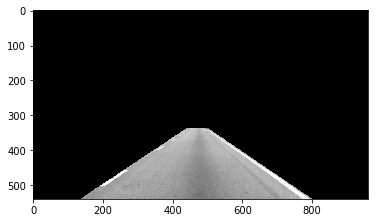

In [177]:
plt.imshow(masked_image, cmap = 'gray') #Print the image on grey scale with the canvas with the region of interest on top of it so only the delimited area we were looking for, and assigned with 0nes, is visible.
masked_image.shape #Show the shape, only one layer as it is gray scale.

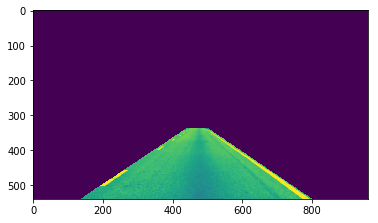

In [178]:
plt.imshow(masked_image) #Observing the same picture abouve but without adding the color map filter as gray

### Finding the region of interest on the road allows a car to distinguish which lane to stay at while in shelf-driving mode. It will not  leave  this region as it would have been programmed to follow the region of interest.

### This is only one of the many steps needed to create a suitable self-driving car software that would guarantee the safety of all occupants on the car and those on the surrounding of the same one.

#### @MoisesBarbera  
#### https://www.github.com/MoisesBarbera   //   https://www.kaggle.com/moisesbarbera   // https://www.linkedin.com/in/moises-barbera-ramos-8a3848164/